# Lecture 7: Gambler's Ruin & Random Variables


## Stat 110, Prof. Joe Blitzstein, Harvard University

----

## Gambler's Ruin

Two gamblers $A$ and $B$ are successively playing a game until one wins all the money and the other is ruined (goes bankrupt). There is a sequence of rounds, with a one dollar bet each time. The rounds are independent events. Let $p = P(\text{A wins a certain round})$ and the inverse is $q = 1 - p$, by convention.

_What is the probability that $A$ wins the entire game?_

Some clarifications:

* there is a total of $N$ dollars in this closed system game (no other money comes into play)
* $A$ starts with $i$ dollars, $B$ starts with $N-i$ dollars

But where do we begin to solve this problem?

### Random Walk

A [random walk](https://en.wikipedia.org/wiki/Random_walk) between two points on a number line is very similar to the Gambler's Ruin.

![title](images/L0701.png)

How many rounds could a game last? Is it possible for the game to continue on to infinity?

Well, notice how this has a very nice __recursive nature__. If $A$ loses a round, the game can be seen as starting anew at $i-1$, and if he wins, the game would start anew at $i+1$. It is the same problem, but with a different starting condition.

### Strategy

Conditioning on the _first step_ is called __first step analysis__.

Let $P_i = P(\text{A wins the entire game|A starts with i dollars})$. Then from the Law of Total Probability, we have:

\begin{align}
    P_i &= p P_{i+1} + q P_{i-1} \text{, } & &\text{where }1 \lt i \lt N-1 \\
    & & & P_0 = 0 \\
    & & & P_N = 1 \\
\end{align}

See how this is a recursive equation? This is called a [__difference equation__](http://mathworld.wolfram.com/DifferenceEquation.html), which is a discrete analog of a differential equation.

### Solving the Difference Equation


\begin{align}
    P_i &= p P_{i+1} + q P_{i-1} & & \\
    \\
    \\
    P_i &= x^i & &\text{see what happens when we guess with a power} \\
    \Rightarrow x^i &= p x^{i+1} + q x^{i-1} \\
    0 &= p x^2 - x + q & &\text{factoring out } x^{i-1} \text{, we are left with a quadratic}\\
    \\
    x &= \frac{1 \pm \sqrt{1-4pq}}{2p} & &\text{solving with the quadratic formula} \\
      &= \frac{1 \pm \sqrt{(2p-1)^2}}{2p} & &\text{since }1-4pq = 1-4p(1-p) = 4p^2 - 4p - 1 = (2p -1)^2 \\
      &= \frac{1 \pm (2p-1)}{2p} \\
      &\in \left\{1, \frac{q}{p} \right\} \\
    \\
    \\
    P_i &= A(1)^i + B\left(\frac{q}{p}\right)^i & &\text{if } p \neq q~~~~ \text{(general solution for difference equation)} \\
    \Rightarrow B &= -A & &\text{from }P_0 = 1\\
    \Rightarrow 1 &= A(1)^N + B\left(\frac{q}{p}\right)^N & &\text{from } P_N = 1\\
    &= A(1)^N - A\left(\frac{q}{p}\right)^N \\
    &= A\left(1-\frac{q}{p}\right)^N \\
    \\
    \\
    \therefore P_i &=
        \begin{cases}
            \frac{1-\left(\frac{q}{p}\right)^i}{1-\left(\frac{q}{p}\right)^N}  & \quad \text{ if } p \neq q \\
            \frac{i}{N}  & \quad \text{ if } p = q \\
        \end{cases}
\end{align}

### Example calculations of $P_i$ over a range of $N$

Assuming an unfair game where $p=0.49$, $q=0.51$:

In [1]:
import math

def gamblers_ruin(i, p, q, N):
    if math.isclose(p,q):
        return i/N
    else:
        return ((1 - (q/p)**i)) / (1 - (q/p)**N)


p = 0.49
q = 1.0 - p

N = 20
i = N/2
print("With N={} and p={}, probability that A wins all is {:.2f}".format(N, p, gamblers_ruin(i, p, q, N)))

N = 100
i = N/2
print("With N={} and p={}, probability that A wins all is {:.2f}".format(N, p, gamblers_ruin(i, p, q, N)))

N = 200
i = N/2
print("With N={} and p={}, probability that A wins all is {:.2f}".format(N, p, gamblers_ruin(i, p, q, N)))

With N=20 and p=0.49, probability that A wins all is 0.40
With N=100 and p=0.49, probability that A wins all is 0.12
With N=200 and p=0.49, probability that A wins all is 0.02


And assuming a fair game where $p = q = 0.5$:

In [2]:
p = 0.5
q = 1.0 - p

N = 20
i = N/2
print("With N={} and p={}, probability that A wins all is {:.2f}".format(N, p, gamblers_ruin(i, p, q, N)))

N = 100
i = N/2
print("With N={} and p={}, probability that A wins all is {:.2f}".format(N, p, gamblers_ruin(i, p, q, N)))

N = 200
i = N/2
print("With N={} and p={}, probability that A wins all is {:.2f}".format(N, p, gamblers_ruin(i, p, q, N)))

With N=20 and p=0.5, probability that A wins all is 0.50
With N=100 and p=0.5, probability that A wins all is 0.50
With N=200 and p=0.5, probability that A wins all is 0.50


#### Could the game ever continue forever on to infinity?

Recall that we have the following solution to the difference equation for the Gambler's Ruin game:

\begin{align}
    P_i &=
        \begin{cases}
            \frac{1-\left(\frac{q}{p}\right)^i}{1-\left(\frac{q}{p}\right)^N}  & \quad \text{ if } p \neq q \\
            \frac{i}{N}  & \quad \text{ if } p = q \\
        \end{cases}
\end{align}

The only time you'd think the game could continue on to infinity is when $p=q$. But

\begin{align}
    P(\Omega) &= 1\\
    &= P(\text{A wins all}) + P(\text{B wins all}) \\
    &= P_i + P_{N-i} \\
    &= \frac{i}{N} + \frac{N-i}{N}
\end{align}

The above implies that aside from the case where $A$ wins all, and the case where $B$ wins all, there is no other event in $\Omega$ to consider, hence the game can never continue on to infinity without either side winning.

This also means that unless $p=q$, you __will__ lose your money, and the only question is how fast will you lose it.

----

# Random Variables

Consider these statements:

\begin{align}
    x + 2 &= 9 \\
    x &= 7
\end{align}

_What is a variable?_
* variable $x$ is a symbol that we use as a substitute for an arbitrary _constant_ value.


_What is a __random__ variable?_

* This is not a _variable_, but a __function from the sample space $S$ to $\mathbb{R}$__.
* It is a "summary" of an aspect of the experiment (this is where the randomness comes from)

Here are a few of the most useful _discrete random variables_.

----

## Bernoulli Distribution

### Description
A probability distribution of a random variable that takes the value 1 in the case of a success with probability $p$; or takes the value 0 in case of a failure with probability $1-p$.

A most common example would be a coin toss, where heads might be considered a success with probability $p=0.5$ if the coin is a fair.

A random variable $x$ has the Bernoulli distribution if
- $x \in \{0, 1\}$
- $P(x=1) = p$
- $P(x=0) = 1-p$

### Notation

$X \sim \text{Bern}(p)$

### Parameters

$0 < p < 1 \text{, } p \in \mathbb{R}$

### Probability mass function

The probability mass function $P(x)$ over possible values $x$

\begin{align}
  P(x) = 
  \begin{cases}
    1-p, &\text{ if } x = 0 \\
    p, &\text{ if } x = 1 \\
  \end{cases} \\
\end{align}

### Expected value

\begin{align}
  \mathbb{E}(X) &= 1 P(X=1) + 0 P(X=0) \\
                &= p
\end{align}

### Special case: Indicator random variables (r.v.)

\begin{align}
  &X = 
  \begin{cases}
    1, &\text{ if event A occurs} \\
    0, &\text{ otherwise} \\
  \end{cases} \\
  \\
  \\
  \Rightarrow &\mathbb{E}(X) = P(A)
\end{align}

## Binomial Distribution 

### Description

The distribution of the number of successes in $n$ independent Bernoulli trials $Bern(p)$, where the chance of success $p$ is the same for all trials $n$. 

Another case might be a string of indicator random variables.

### Notation

$X \sim \text{Bin}(n, p)$

### Parameters

- $n \in \mathbb{N}$
- $p \in [0,1]$

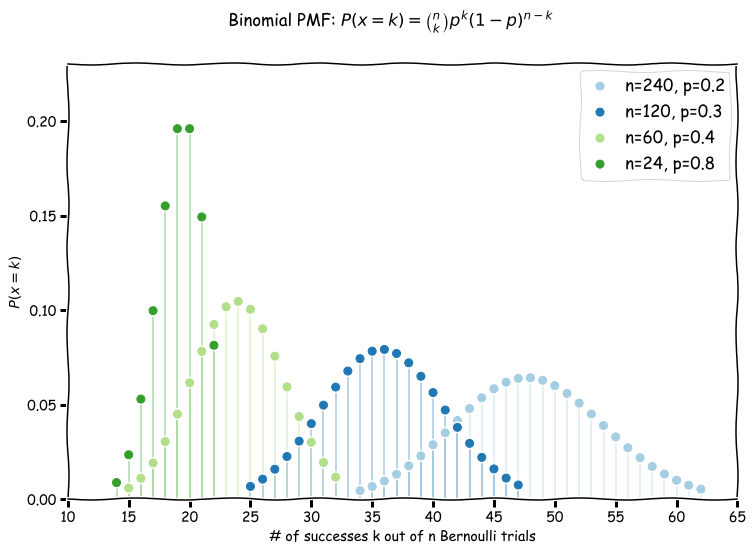

In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.stats import binom

%matplotlib inline

plt.xkcd()

_, ax = plt.subplots(figsize=(12,8))

# a few Binomial parameters n and p
pop_sizes = [240, 120, 60, 24]
p_values = [0.2, 0.3, 0.4, 0.8]
params = list(zip(pop_sizes, p_values))

# colorblind-safe, qualitative color scheme
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c']

for i,(n,p) in enumerate(params):
    x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
    y = binom.pmf(x, n, p)
    ax.plot(x, y, 'o', ms=8, color=colors[i], label='n={}, p={}'.format(n,p))
    ax.vlines(x, 0, y, color=colors[i], alpha=0.3)

# legend styling
legend = ax.legend()
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)

# y-axis
ax.set_ylim([0.0, 0.23])
ax.set_ylabel(r'$P(x=k)$')

# x-axis
ax.set_xlim([10, 65])
ax.set_xlabel('# of successes k out of n Bernoulli trials')

# x-axis tick formatting
majorLocator = MultipleLocator(5)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(1)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)

plt.suptitle(r'Binomial PMF: $P(x=k) = \binom{n}{k} p^k (1-p)^{n-k}$')

plt.show()

### Probability mass function

\begin{align}
    P(x=k) &= \binom{n}{k} p^k (1-p)^{n-k}
\end{align}

### Expected value

\begin{align}
    \mathbb{E}(X) = np
\end{align}

## In parting...

Now think about this true statement as we move on to Lecture 3:

\begin{align}
    X &\sim \text{Bin}(n,p) \text{, } Y \sim \text{Bin}(m,p) \\
    \rightarrow X+Y &\sim \text{Bin}(n+m, p)
\end{align}

----

## Appendix A: Solving $P_i$ when $p=q$ using l'Hopital's Rule

To solve for for the case where $p = q$, let $x = \frac{q}{p}$.

\begin{align}
    lim_{x \rightarrow 1}{\frac{1-x^i}{1-x^N}} &= lim_{x\rightarrow1}{\frac{ix^{i-1}}{Nx^{N-1}}} &\text{ by l'Hopital's Rule} \\
    &= \frac{i}{N}
\end{align}


----